In [1]:
from ligeor import TwoGaussianModel as TwoG
import numpy as np
import matplotlib.pyplot as plt

In [50]:
def test_initialize_filename(filename, data):
    model = TwoG(filename=filename, n_downsample=1, delimiter=',')
    assert(((model.phases == data[:,0]) & (model.fluxes == data[:,1]) & (model.sigmas == data[:,2])).all())

    
def test_initialize_data(data):
    model = TwoG(phases=data[:,0], fluxes=data[:,1], sigmas=data[:,2])
    assert(((model.phases == data[:,0]) & (model.fluxes == data[:,1]) & (model.sigmas == data[:,2])).all())
    return model


def test_estimate_ecl_pos_widths(model, result):
    est_positions = model.estimate_eclipse_positions_widths(model.phases, model.fluxes)
    estimates = {}
    estimates['pos1'] = est_positions['ecl_positions'][0]
    estimates['pos2'] = est_positions['ecl_positions'][1]
    estimates['width1'] = est_positions['ecl_widths'][0]
    estimates['width2'] = est_positions['ecl_widths'][1]
    
    for key in result.keys():
        assert(np.abs(estimates[key] - result[key]) < 2e-1)
    

def test_fit(model, result):
    model.fit()
    print(np.array(model.best_fit['param_vals'][0]) - 
              np.array(result['param_vals']))
    assert((np.abs(
              np.array(model.best_fit['param_vals'][0]) - 
              np.array(result['param_vals'])) < 
               1e-4*np.ones(len(model.best_fit['param_vals'][0]))).all())
    
def test_compute_ecl_params(model, result):
    eb_dict = model.compute_eclipse_params()
    for key in eb_dict.keys():
        if key in result.keys():
            assert(np.abs(eb_dict[key] - result[key]) < 1e-3)
        else:
            assert(np.isnan(eb_dict[key]))

In [51]:
C = 1.
mu1 = 0.
sigma1 = 0.015
d1 = 0.5
mu2 = 0.42
sigma2 = 0.01
d2 = 0.35
Aell = 0.05
phi01 = 0.
phi02 = 0.42

In [52]:
data_c = np.loadtxt('../data/const.csv', delimiter=',')
data_cg = np.loadtxt('../data/cg.csv', delimiter=',')
data_ce = np.loadtxt('../data/ce.csv', delimiter=',')
data_cge = np.loadtxt('../data/cge.csv', delimiter=',')
data_cg12 = np.loadtxt('../data/cg12.csv', delimiter=',')
data_cg12e1 = np.loadtxt('../data/cg12e1.csv', delimiter=',')
data_cg12e2 = np.loadtxt('../data/cg12e2.csv', delimiter=',')

In [53]:
model_c = test_initialize_data(data_c)
model_cg = test_initialize_data(data_cg)
model_ce = test_initialize_data(data_ce)
model_cge = test_initialize_data(data_cge)
model_cg12 = test_initialize_data(data_cg12)
model_cg12e1 = test_initialize_data(data_cg12e1)
model_cg12e2 = test_initialize_data(data_cg12e2)

In [6]:
model_cge.fit()

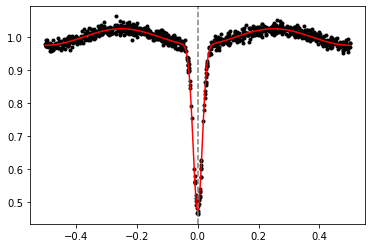

In [20]:
plt.plot(model_cge.phases, model_cge.fluxes, 'k.')
plt.plot(model_cge.phases, model_cge.best_fit['model'], 'r-')
plt.axvline(x=model_cge.best_fit['param_vals'][0][1], c='grey', ls='--')

In [11]:
model_cg12e2.fit()

In [18]:
model_cg12e2.best_fit['param_vals'][0]
model_cg12e2.best_fit['param_names']

['C', 'mu1', 'd1', 'sigma1', 'mu2', 'd2', 'sigma2', 'Aell']

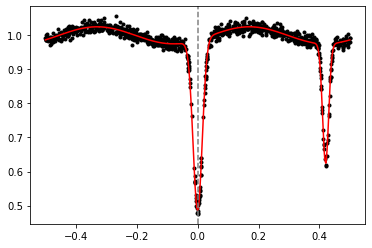

In [19]:
plt.plot(model_cg12e2.phases, model_cg12e2.fluxes, 'k.')
plt.plot(model_cg12e2.phases, model_cg12e2.best_fit['model'], 'r-')
plt.axvline(x=model_cg12e2.best_fit['param_vals'][0][1], c='grey', ls='--')

In [21]:
def test_cg12e1():
    data = np.loadtxt('../data/cg12e1.csv', delimiter=',')
    model = TwoG(phases=data[:,0], fluxes=data[:,1], sigmas=data[:,2])
    result_fit = {'func': 'CG12E', 'param_vals': [C, mu1, d1, sigma1, mu2, d2, sigma2, Aell, phi01]}
    model.fit()
    return model

def test_cg12e2():
    data = np.loadtxt('../data/cg12e2.csv', delimiter=',')
    model = TwoG(phases=data[:,0], fluxes=data[:,1], sigmas=data[:,2])
    result_fit = {'func': 'CG12E', 'param_vals': [C, mu1, d1, sigma1, mu2, d2, sigma2, Aell, phi02]}
    model.fit()
    return model

In [22]:
model_1 = test_cg12e1()
model_2 = test_cg12e2()

In [23]:
model_1.best_fit['param_vals'][0]

array([ 1.00002630e+00, -5.75952684e-06,  5.00008161e-01,  1.49946799e-02,
        4.20044453e-01,  3.50974728e-01,  9.98439401e-03,  5.01088884e-02])

(array([  4.,  22.,  96., 225., 273., 229., 103.,  38.,   9.,   1.]),
 array([-0.03248747, -0.02539398, -0.0183005 , -0.01120701, -0.00411353,
         0.00297996,  0.01007345,  0.01716693,  0.02426042,  0.0313539 ,
         0.03844739]),
 <BarContainer object of 10 artists>)

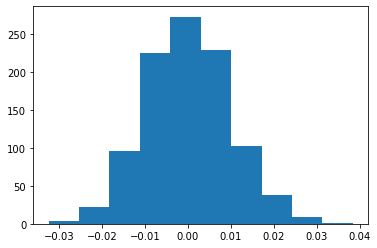

In [24]:
plt.hist((model_1.fluxes - model_1.best_fit['model']))

In [25]:
np.std((model_1.fluxes - model_1.best_fit['model']))

0.009781558290075385

In [15]:
ecl=2
mu_ind = model_1.best_fit['param_names']

In [24]:
model_1.best_fit['param_names']

['C', 'mu1', 'd1', 'sigma1', 'mu2', 'd2', 'sigma2', 'Aell', 'phi0']

In [17]:
model_1.compute_residuals_stdev()

(0.00016319903687338254, 0.009781973714560828)

In [21]:
model_1.compute_eclipse_area(ecl=1)

1 3 2


0.018697296609825834